In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn import metrics

Using TensorFlow backend.


## Load data

In [2]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

In [16]:
def show_img(img, ax):
    ax.imshow(img, cmap='Greys')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

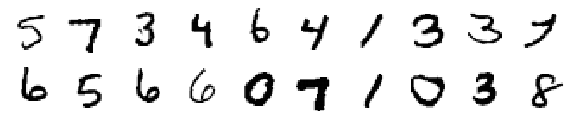

In [17]:
row_count = 2
column_count = 10

fig, ax = plt.subplots(row_count, column_count, figsize=(column_count, row_count))
plt.axis('off')

for x in range(row_count):
    for y in range(column_count):
        show_img(x_train_orig[np.random.randint(0, x_train_orig.shape[0] - 1)], ax[x, y])

plt.show()

## Pre-prcess data

In [5]:
img_rows = 28
img_cols = 28
num_classes = 10

In [6]:

# Add missing channel dimension
x_train = x_train_orig.reshape(x_train_orig.shape[0], img_rows, img_cols, 1)
x_test = x_test_orig.reshape(x_test_orig.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train_orig, num_classes)
y_test = keras.utils.to_categorical(y_test_orig, num_classes)

In [7]:
mask_train = np.random.binomial(1, .05, y_train.shape[0]).astype('bool')
mask_test = np.random.binomial(1, .1, y_test.shape[0]).astype('bool')

x_train = x_train[mask_train]
x_test = x_test[mask_test]

y_train = y_train[mask_train]
y_test = y_test[mask_test]

## Define model

In [8]:
model = Sequential();
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

## Train model

In [10]:
batch_size = 32
epochs = 6

In [11]:
%%time
train_hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 3110 samples, validate on 1016 samples
Epoch 1/6
3110/3110 [==============================] - 6s 2ms/step - loss: 0.6832 - categorical_accuracy: 0.7926 - val_loss: 0.3968 - val_categorical_accuracy: 0.8740
Epoch 2/6
3110/3110 [==============================] - 15s 5ms/step - loss: 0.2600 - categorical_accuracy: 0.9193 - val_loss: 0.2642 - val_categorical_accuracy: 0.9232
Epoch 3/6
3110/3110 [==============================] - 9s 3ms/step - loss: 0.1437 - categorical_accuracy: 0.9556 - val_loss: 0.2134 - val_categorical_accuracy: 0.9331
Epoch 4/6
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0821 - categorical_accuracy: 0.9733 - val_loss: 0.1714 - val_categorical_accuracy: 0.9528
Epoch 5/6
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0506 - categorical_accuracy: 0.9855 - val_loss: 0.1738 - val_categorical_accuracy: 0.9508
Epoch 6/6
3110/3110 [==============================] - 6s 2ms/step -

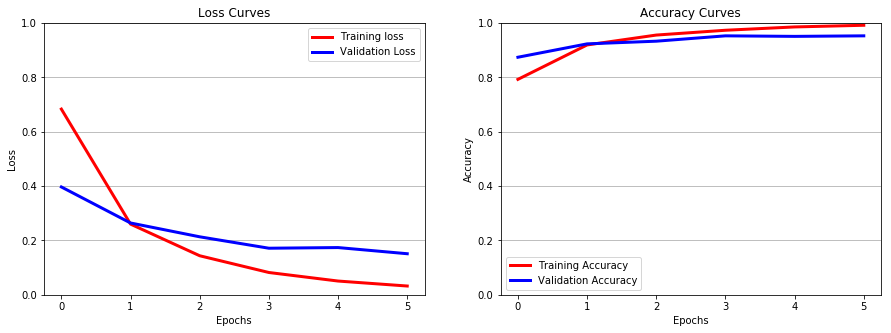

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Loss Curves
ax[0].plot(train_hist.history['loss'],'r',linewidth=3.0)
ax[0].plot(train_hist.history['val_loss'],'b',linewidth=3.0)
ax[0].grid(True, axis = 'y')
ax[0].legend(['Training loss', 'Validation Loss'])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curves')

# Accuracy Curves
ax[1].plot(train_hist.history['categorical_accuracy'],'r',linewidth=3.0)
ax[1].plot(train_hist.history['val_categorical_accuracy'],'b',linewidth=3.0)
ax[1].grid(True, axis = 'y')
ax[1].legend(['Training Accuracy', 'Validation Accuracy'])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curves')

plt.show()

## Validate

In [13]:
y_test_pred = model.predict(x_test)

y_test_value = np.argmax(y_test, axis=1)
y_test_pred_value = np.argmax(y_test_pred, axis=1)

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


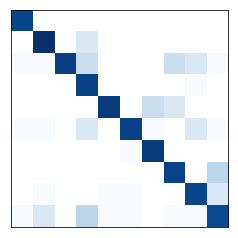

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test_value, y_test_pred_value)
plt.imshow(np.log(confusion_matrix), cmap='Blues')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [15]:
print('Accuracy:', metrics.accuracy_score(y_test_value, y_test_pred_value))

Accuracy: 0.952755905511811
